## Posttest 5

### Supervised Learning

Dataset yang digunakan adalah Brazilian E-Commerce Public Dataset by Olist. Ini adalah kumpulan data publik e-niaga Brasil dari pesanan yang dibuat di Olist Store . Dataset memiliki informasi 100k pesanan dari 2016 hingga 2018 yang dibuat di beberapa pasar di Brasil. Fitur-fiturnya memungkinkan melihat pesanan dari berbagai dimensi: dari status pesanan, harga, kinerja pembayaran dan pengiriman hingga lokasi pelanggan, atribut produk, dan akhirnya ulasan yang ditulis oleh pelanggan. Kami juga merilis kumpulan data geolokasi yang menghubungkan kode pos Brasil dengan koordinat lat/lng.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer #subtitusi nilai
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Membaca file dataset
payment = pd.read_csv('olist_order_payments_dataset.csv')

### Melihat jumlah pengguna dari masing-masing tipe pembayaran

In [3]:
payment_count_index = payment[['payment_type']].groupby(payment['payment_type']).count()
payment_count_index = payment_count_index.rename(columns = {'payment_type':'num_of_payment'})
payment_count = payment_count_index.reset_index()
payment_count

,payment_type,num_of_payment
0,boleto,19784
1,credit_card,76798
2,debit_card,1529
3,voucher,5775


In [4]:
payment["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

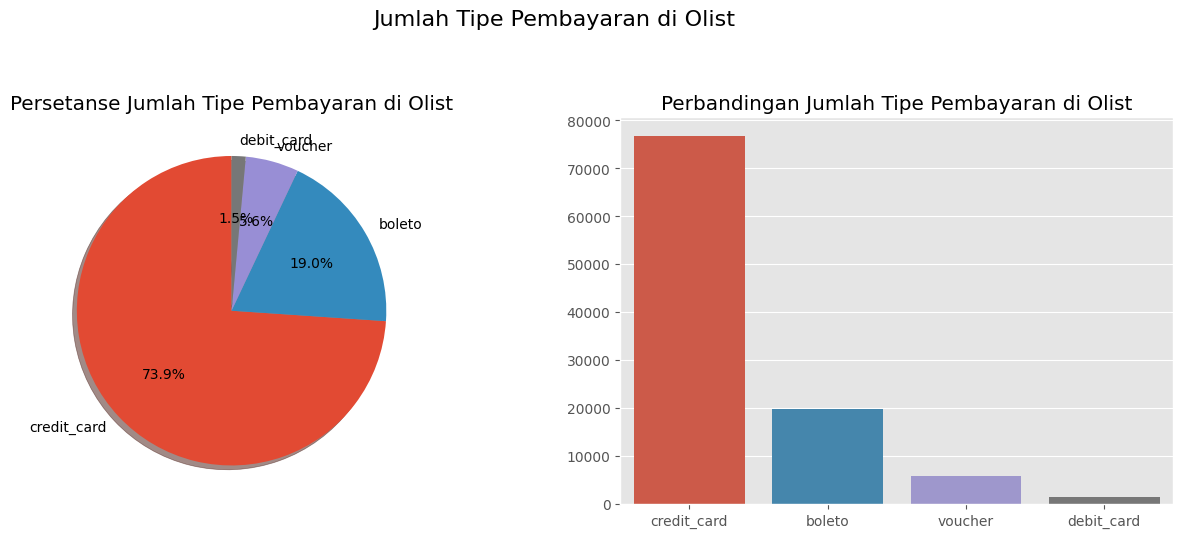

In [5]:
plt.style.use('ggplot')

speciesGroup = payment["payment_type"].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.tight_layout(pad=5.0)

ax[0].pie(speciesGroup['payment_type'],labels=speciesGroup['index'],startangle=90,autopct='%.1f%%',shadow=True)
ax[0].title.set_text("Persetanse Jumlah Tipe Pembayaran di Olist")


X_index = list(speciesGroup['index'])
y_species = list(speciesGroup['payment_type'])
sns.barplot(x=X_index,y=y_species,ax=ax[1])
ax[1].title.set_text("Perbandingan Jumlah Tipe Pembayaran di Olist")

fig.subplots_adjust(top=0.8)
plt.suptitle("Jumlah Tipe Pembayaran di Olist",size=16)
plt.show()

Tipe pembayaran ada 4 dimana tipe pembayaran menggunakan credit card mendominasi dengan total penggunaan sebanyak 76.798 pengguna

<Figure size 2000x1500 with 0 Axes>

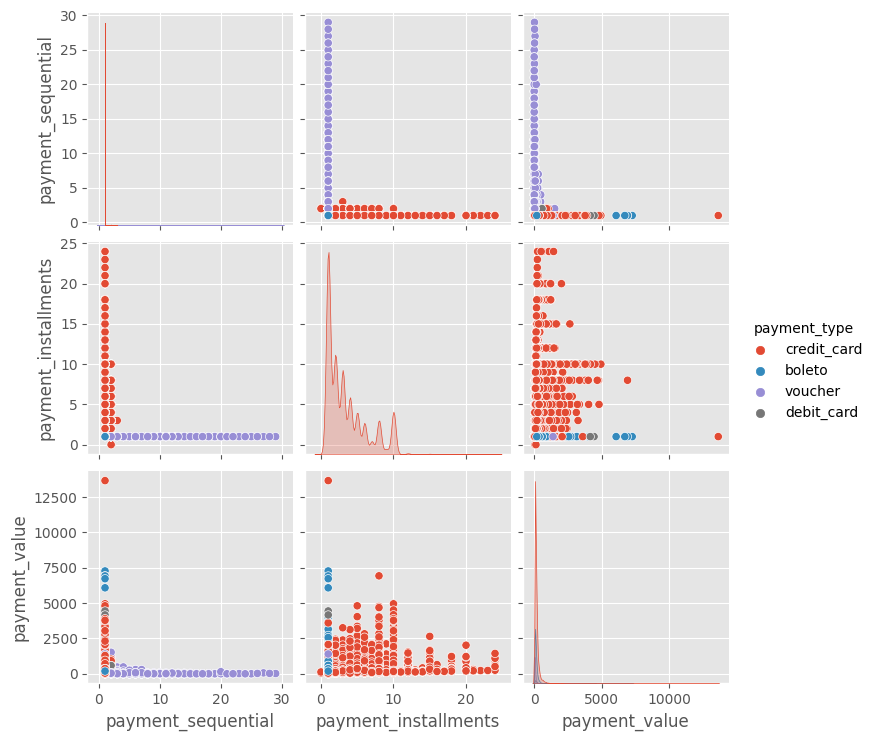

In [6]:
plt.figure(figsize=(20,15))
sns.pairplot(payment,hue="payment_type")
plt.show()

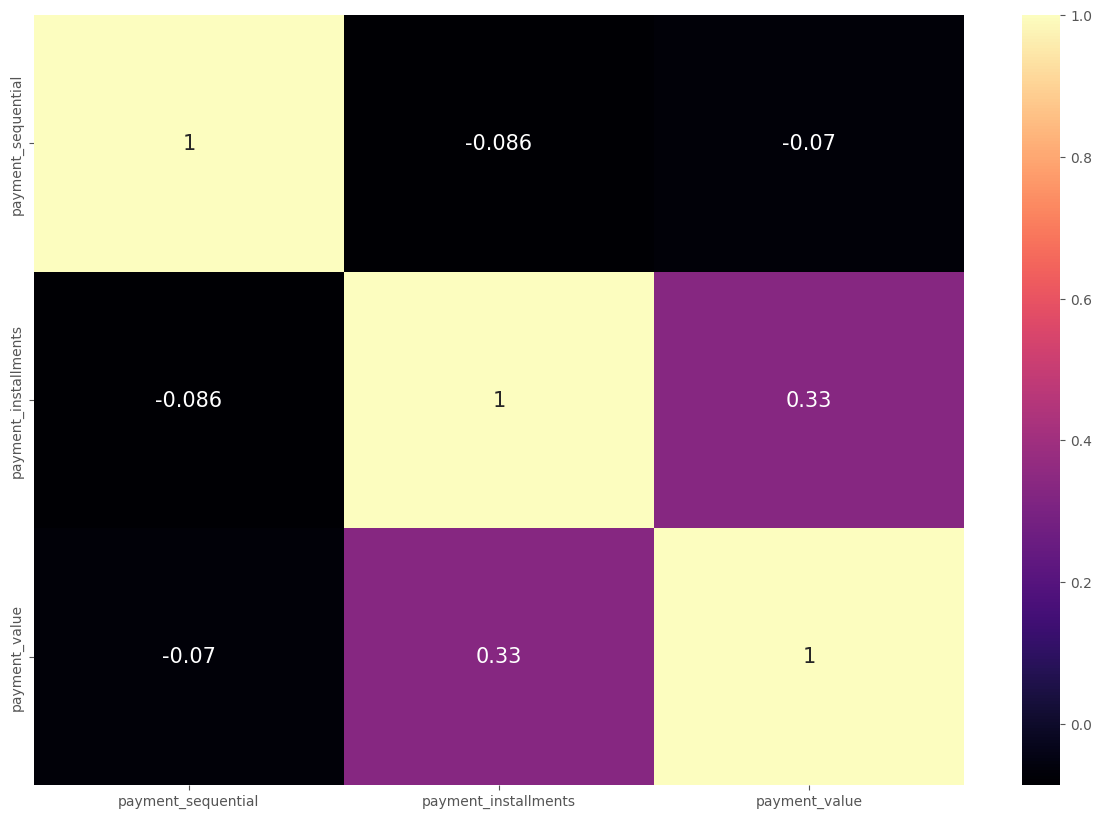

In [7]:
plt.figure(figsize=(15,10))

sns.heatmap(payment.corr(),cmap='magma',annot=True,annot_kws={"size":15})
plt.show()

In [8]:
x = payment.drop(['order_id', 'payment_type'], axis = 1)
y = payment['payment_type']

In [9]:
x.head()

,payment_sequential,payment_installments,payment_value
0,1,8,99.33
1,1,1,24.39
2,1,1,65.71
3,1,8,107.78
4,1,2,128.45


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
x.head()

,payment_sequential,payment_installments,payment_value
0,1,8,99.33
1,1,1,24.39
2,1,1,65.71
3,1,8,107.78
4,1,2,128.45


## Algoritma Supervised Learning

### 1. K-Nearest Neighbors (KNN)

K-Nearest Neighbour atau algoritma KNN dimana sebuah yang menggunakan algoritma non-parametrik dan yang mengelompokkan poin data berdasarkan kedekatan dan juga asosiasi mereka dengan data lain. dimana algoritma ini mengasumsikan sebuah titik data yang serupa akan selalu bisa ditemukan disekitarnya.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [13]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
knn.score(x_test, y_test)

0.7743053327343901

In [15]:
knn_pred = knn.predict(x_test)
print(knn_pred)

['boleto' 'boleto' 'credit_card' ... 'credit_card' 'credit_card'
 'credit_card']


In [16]:
print(classification_report(y_test, knn_pred))
acc_knn = accuracy_score(y_test, knn_pred)
print("Akurasi algoritma KNN dengan default paramater :", round(acc_knn,2))

              precision    recall  f1-score   support

      boleto       0.46      0.49      0.48      6004
 credit_card       0.85      0.87      0.86     22981
  debit_card       0.00      0.00      0.00       432
     voucher       0.96      0.71      0.82      1749

    accuracy                           0.77     31166
   macro avg       0.57      0.52      0.54     31166
weighted avg       0.77      0.77      0.77     31166

Akurasi algoritma KNN dengan default paramater : 0.77


#### Jumlah akurasi dengan menggunakan algoritma KNN adalah 0.77

### 2. Decision Tree

Decision Tree adalah sebuah tipe model yang digunakan untuk Supervised
Learning. Decision Tree dapat digunakan untuk menyelesaikan masalah
klasifikasi dan regresi, namun lebih sering digunakan untuk masalah
klasifikasi.

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7)

In [18]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [19]:
dt_pred = dt.predict(x_test)
print(classification_report(y_test, dt_pred))
acc_dt = accuracy_score(y_test, dt_pred)
print("Akurasi algoritma Decision Tree dengan default paramater :", round(acc_dt,2))

              precision    recall  f1-score   support

      boleto       0.57      0.29      0.38      6004
 credit_card       0.82      0.95      0.88     22981
  debit_card       0.00      0.00      0.00       432
     voucher       0.97      0.74      0.84      1749

    accuracy                           0.80     31166
   macro avg       0.59      0.50      0.53     31166
weighted avg       0.77      0.80      0.77     31166

Akurasi algoritma Decision Tree dengan default paramater : 0.8


#### Jumlah akurasi dengan menggunakan algoritma Decission Tree adalah 0.8

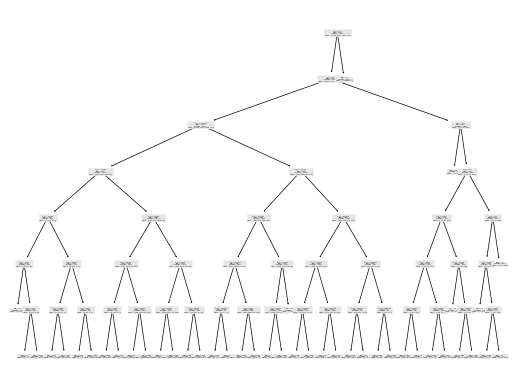

In [20]:
from sklearn import tree

tree.plot_tree(dt)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,3,4,5,6,7]}
grid = GridSearchCV(dt, params, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=7),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7]}, scoring='accuracy')

In [22]:
print(grid.best_params_)

{'max_depth': 7}


karena best params ialah max dept 7, jadi saya menggunakan max_depth: 7

### 3. Naive Bayes
Berikutnya ada Naïve Bayes, yang mengadopsi prinsip kemandirian kelas
bersyarat dari Teorema Bayes. Dalam prinsip tersebut, ada tidaknya satu
elemen tidak akan memengaruhi komponen lain dalam probabilitas hasil yang
akan diberikan, dengan predictor yang mendapatkan efek yang sama.
Naïve Bayes kemudian dibagi menjadi tiga menurut penggolonganya:
1. Multinomial Naïve Bayes
2. Bernoulli Naïve Bayes
3. Gaussian Naïve Bayes.

Namun, pada kali ini saya hanya akan menggunakan 2 jenis yaitu Gaussian dan Multinomial.

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()

In [24]:
gnb.fit(x_train, y_train)

GaussianNB()

In [25]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [26]:
gnb_pred = gnb.predict(x_test)
mnb_pred = mnb.predict(x_test)

print("Gaussian NB : ")
print(classification_report(y_test, gnb_pred))
acc_gnb = accuracy_score(y_test, gnb_pred)
print("Akurasi algoritma Gaussian Naive Bayes dengan default paramater :", round(acc_gnb,2))

Gaussian NB : 
              precision    recall  f1-score   support

      boleto       0.42      1.00      0.59      6004
 credit_card       1.00      0.67      0.80     22981
  debit_card       0.05      0.00      0.00       432
     voucher       0.97      0.73      0.83      1749

    accuracy                           0.73     31166
   macro avg       0.61      0.60      0.56     31166
weighted avg       0.87      0.73      0.75     31166

Akurasi algoritma Gaussian Naive Bayes dengan default paramater : 0.73


#### Jumlah akurasi dengan menggunakan algoritma Gaussian Naive Bayes adalah 0.73

In [27]:
print("Multinomial NB : ")
print(classification_report(y_test, mnb_pred))
acc_mnb = accuracy_score(y_test, mnb_pred)
print("Akurasi algoritma Multinomia Naive Bayes dengan default paramater :", round(acc_mnb,2))

Multinomial NB : 
              precision    recall  f1-score   support

      boleto       0.42      0.21      0.28      6004
 credit_card       0.78      0.93      0.85     22981
  debit_card       0.00      0.00      0.00       432
     voucher       0.98      0.39      0.56      1749

    accuracy                           0.75     31166
   macro avg       0.54      0.38      0.42     31166
weighted avg       0.71      0.75      0.71     31166

Akurasi algoritma Multinomia Naive Bayes dengan default paramater : 0.75


#### Jumlah akurasi dengan menggunakan algoritma Multinomial Naive Bayes adalah 0.75

### 4. Suport Vector Machine (SVM)

Support Vector Machine atau sering disingkat SVM merupakan metode
algoritma Supervised Learning yang dikembangkan oleh Vladimir Vapnik.
Metode ini biasanya digunakan dalam data classification dan juga regression.
Metode Support Vector Machine sering dimanfaatkan dalam masalah
klasifikasi serta pembangunan hyperplane atau batas keputusan yang
memisahkan kelas-kelas titik data.

In [28]:
from sklearn.svm import SVC

svm = SVC()

In [43]:
svm.fit(x_train, y_train)

SVC()

In [41]:
svm_pred = svm.predict(x_test)
print(classification_report(y_test, svm_pred))
acc_svm = accuracy_score(y_test, svm_pred)
print("Akurasi algoritma Super Vector Machine (SVM) dengan default paramater :", round(acc_svm,2))

              precision    recall  f1-score   support

      boleto       0.00      0.00      0.00      6004
 credit_card       0.74      1.00      0.85     22981
  debit_card       0.00      0.00      0.00       432
     voucher       1.00      0.05      0.09      1749

    accuracy                           0.74     31166
   macro avg       0.43      0.26      0.24     31166
weighted avg       0.60      0.74      0.63     31166

Akurasi algoritma Super Vector Machine (SVM) dengan default paramater : 0.74


#### Jumlah akurasi dengan menggunakan algoritma Super Vector Machine (SVM) adalah 0.74

## Membandingkan Algoritma

Dari 4 algoritma yang telah dicoba, selanjutnya saya akan membandingkan ke 5 algoritma tersebut dengan klasifikasi menggunakan diagram batang.

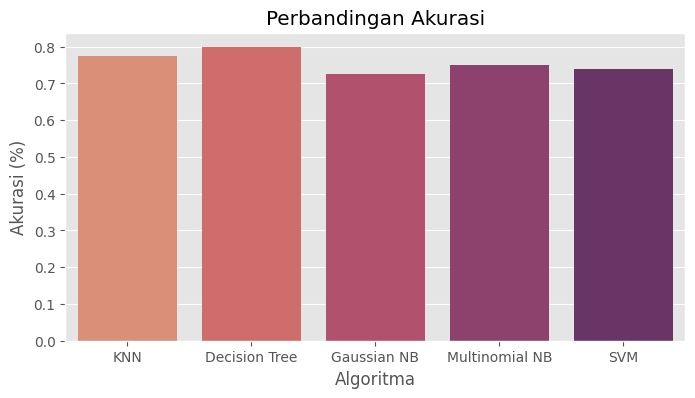

In [48]:
algoritma = ["KNN","Decision Tree","Gaussian NB","Multinomial NB","SVM"]
pred_value = [acc_knn,acc_dt,acc_gnb,acc_mnb,acc_svm]

plt.figure(figsize=(8,4))

sns.barplot(x= algoritma,y = pred_value,palette='flare')

plt.title("Perbandingan Akurasi")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

Dari kelima algoritma diatas, dapat disimpulkan bahwa algoritma Decission Tree merupakan algoritma yang memiliki nilai akurasi paling mendekati sempurna dibanding algoritma yang lainnya dengan nilai akurasi sebesar 0,8.

### Regression

In [32]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

In [33]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [44]:
# lg.fit(payment[['payment_value']], payment.payment_installments)

In [45]:
# print(lg.predict([[1.1]]))

In [46]:
# plt.figure(figsize=(5,3))
# plt.xlabel('Jumlah Pembayaran')
# plt.ylabel('Pencicilan')
# plt.scatter(payment[['payment_value']], payment.payment_installments, color = "blue", label = "Nilai Aktual")
# plt.plot(payment[['payment_value']], lg.predict(payment[['payment_value']]), color='grey', label = "Nilai Prediksi")
# plt.legend()
# plt.show()

In [37]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### Visualisasi Hasil prediksi Linear Regression

In [38]:
X_payment = payment[["payment_value"]] # Feature
y_payment = payment["payment_installments"] # Target

#Split data
X_trainpayment, X_testpayment, y_trainpayment, y_testpayment = train_test_split(X_payment, y_payment, test_size=0.2)


In [39]:
#Buat objek dari regresi linear
reg = LinearRegression()

#Latih model
reg.fit(X_trainpayment,y_trainpayment)

LinearRegression()

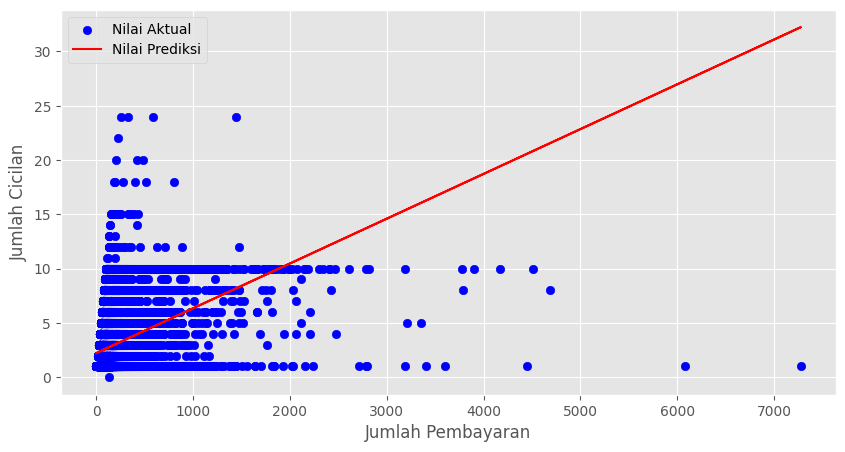

In [40]:
#Buat prediksi
y_pred = reg.predict(X_testpayment)

plt.figure(figsize=(10,5))

plt.xlabel("Jumlah Pembayaran")
plt.ylabel("Jumlah Cicilan")

plt.scatter(X_testpayment, y_testpayment, color="blue",label="Nilai Aktual")
plt.plot(X_testpayment, y_pred, color="red",label="Nilai Prediksi")
plt.legend()
plt.show()